# Analysis of Moscow, Russia Neighbourhoods using Machine Learning
This is a notebook by Alex Pr 

## Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

# Methodology 

The key criteria for my research are:

- high population of the boroughs 
- low cost of real estate in the boroughs area
- the absence in the immediate vicinity of the other same facilities

Analysis task:

- first is to find boroughs with highest population and smallest housing price
- second is to provide a tool or methodology for determining vicinity of other same type facilities in the borough

To perform 1st task it is used:  

- exploratory data analysis, including descriptive statistical analys, categorical variables analysis and сorrelation analysis
- segmentation with K-Means clustering

To perform 2d task visualization approach is used to obtain spatial distribution of venues and mapping them on to the interactive choropleth map and heatmap.  
This result demonstrates where there is a good place for startig a new facility and can be easily used by stakeholders.

#### Import requied libraries

In [175]:
# Import requied libraries
import pandas as pd # library for data analsysis
import folium
from folium.plugins import HeatMap
import numpy as np # library to handle data in a vectorized manner
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

#### Load previously prepeareds datasets

In [176]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")
mo_geojson = 'mo.geojson'

**_required clarification:_**
It is not so easy for Moscow districts to collect inflormation, it is not displayed in the wiki in a proper way, like we have used for Toronto and NY cases.
For the purposes of this study, data was collected manually, preprocessed and merged in one DataFrame. In this notebook we use the result in csv and geojson file. For this was used https://tableau.pro/datasets


## Exploratory Data Analysis

The key criteria for my research are:

- high population of the borough
- low cost of real estate in the area

We have theese key features in Moscow Boroughs dataset:

- District - name of the Moscow District in which Borough is belong to
- Area - area of the Moscow Borough in square kilometers
- Population_Density - population density of the Moscow Borough
- Housing_Area - housing area of the Moscow Borough in square meters

Let's analyze features and key criteria using:

- descriptive statistical analysis
- categorical variables  analysis
- сorrelation analysis

### Descriptive statistical analysis

Сreate subset of the feature

In [177]:
# list of the potential features
Moscow_Borough_Feature_list = ['Borough_Name', 'District_Name', 'Borough_Area', 'Borough_Population_Density', 'Borough_Housing_Area', 'Borough_Population', 'Borough_Housing_Price']

# create subset of the potential features
Moscow_Borough_Feature_df = Moscow_Borough_df[Moscow_Borough_Feature_list]

# rename columns for easier understanding
Moscow_Borough_Feature_df.columns = ['Borough', 'District', 'Area', 'Population_Density', 'Housing_Area', 'Population', 'Housing_Price']

# Take a look at the correlation matrix 
print('Take a look at the features dataframe')
Moscow_Borough_Feature_df.head(10)

Take a look at the features dataframe


Borough District  Area  Population_Density  Housing_Area  \
0    Академический     ЮЗАО  5.83               18762        2467.0   
1     Алексеевский     СВАО  5.29               15223        1607.9   
2     Алтуфьевский     СВАО  3.25               17721         839.3   
3            Арбат      ЦАО  2.11               17120         731.0   
4         Аэропорт      САО  4.58               17355        1939.7   
5     Бабушкинский     СВАО  5.07               17462        1586.3   
6        Басманный      ЦАО  8.37               13225        1991.8   
7          Беговой      САО  5.56                7694         791.1   
8  Бескудниковский      САО  3.30               24122        1391.7   
9         Бибирево     СВАО  6.45               24831        2521.8   

   Population  Housing_Price  
0      109387       199999.0  
1       80534       199474.0  
2       57596       138021.0  
3       36125       438568.0  
4       79486       234544.0  
5       88537       164324.0  
6      110694       302021.0  
7       42781       261402.0  
8       79603       158398.0  
9      160163       140533.0

Compute basic statistics for all features

In [178]:
# the count of that variable
# the mean
# the standard deviation (std)
# the minimum value
# the IQR (Interquartile Range: 25%, 50% and 75%)
# the maximum value

print('Take a look at the basic statistics')
Moscow_Borough_Feature_df.describe()

Take a look at the basic statistics


Area  Population_Density  Housing_Area     Population  \
count  120.000000          120.000000    120.000000     120.000000   
mean     8.706417        13426.608333   1775.684167   99847.608333   
std      4.927028         5956.551611    815.978445   44024.992123   
min      2.110000          559.000000     69.900000   12194.000000   
25%      5.395000         9745.750000   1244.450000   71821.750000   
50%      7.680000        13266.000000   1709.450000   93892.000000   
75%     10.282500        17151.000000   2206.600000  126545.750000   
max     27.570000        30428.000000   4523.000000  253943.000000   

       Housing_Price  
count     120.000000  
mean   190037.316667  
std     66182.885601  
min    109421.000000  
25%    147339.000000  
50%    168172.500000  
75%    210978.000000  
max    438568.000000

As we can see, Moscow Boroughs has a very uneven population from 12 194 people to 253 943 people.  
The average cost of real estate varies from 109 421 rubles/m²  to 438 568 rubles/m².

In [179]:
a = Moscow_Borough_Feature_df.sort_values('Population_Density') 
a.head(10)

Borough District   Area  Population_Density  Housing_Area  \
58        Молжаниновский      САО  21.78                 559          69.9   
54          Метрогородок      ВАО  27.57                1415         575.7   
16               Внуково      ЗАО  17.42                1462         416.6   
89              Северный     СВАО  10.29                3746         620.0   
35               Капотня     ЮВАО   8.06                4019         408.5   
44               Куркино     СЗАО   7.90                4305         900.0   
20             Восточный      ВАО   3.14                4359         227.5   
76  Покровское-Стрешнево     СЗАО  12.90                4604        1006.7   
75             Печатники     ЮВАО  17.89                4839        1369.3   
71          Останкинский     СВАО  12.46                5097        1131.4   

    Population  Housing_Price  
58       12194       110572.0  
54       39024       132441.0  
16       25471       113399.0  
89       38551       120878.0  
35       32399       120200.0  
44       34012       168022.0  
20       13689       118030.0  
76       59402       194344.0  
75       86587       144301.0  
71       63514       214077.0

In [216]:
import plotly.express as px 

#df = px.data.tips()
df = Moscow_Borough_Feature_df

fig = px.sunburst(df, path=['Area', 'Population_Density'], values='Area', color='Population_Density') 
fig.show()


### Categorical variables  analysis

I have one categorical variable - name of the Moscow District in which Borough is belong to.  
Let's analize relationship between categorical feature 'District' and key criteria using boxplots visualization.

Let's look at the relationship between 'District' and 'Population'


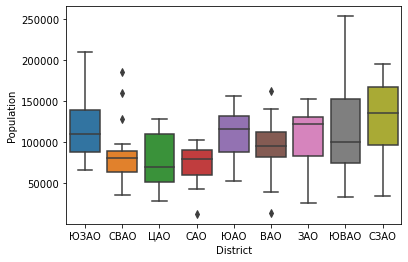

In [181]:
print ("Let's look at the relationship between 'District' and 'Population'")
sns.boxplot(x="District", y="Population", data=Moscow_Borough_Feature_df)

We can see that the distributions of Population between Boroughs in the different Districts have aт overlap, but we can estimate, that the most populated Boroughs are placed in 'ЮЗАО', 'ЮАО', 'СЗАО' and 'ЗАО' Districts.  


Let's look at the relationship between 'District' and 'Housing Price'


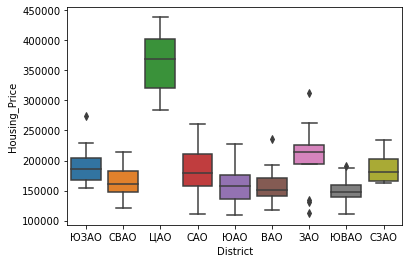

In [182]:
print ("Let's look at the relationship between 'District' and 'Housing Price'")
sns.boxplot(x="District", y="Housing_Price", data=Moscow_Borough_Feature_df)

We see that the distributions of Housing Price between Boroughs in the different Districts are distinct enough.

As the result of boxplots visualization, categorical feature 'District' would be a good potential redictor only of Housing Price.

### Correlation analysis

**Calculate and visualize correlation matrix**

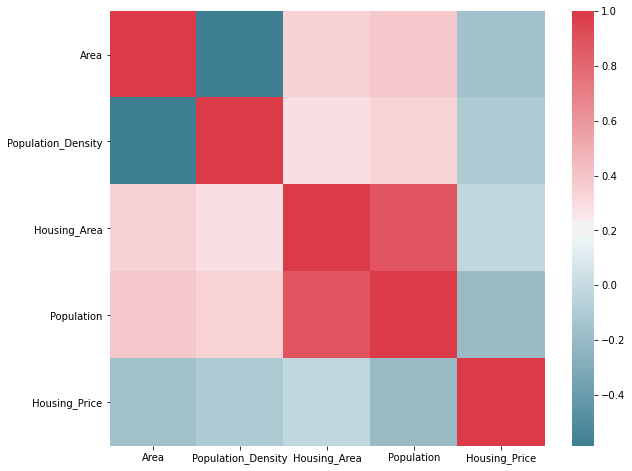

In [183]:
# calculate correlation matrix 
Moscow_Borough_Feature_corr = Moscow_Borough_Feature_df.corr()

# visualize correlation matrix 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Moscow_Borough_Feature_corr, mask=np.zeros_like(Moscow_Borough_Feature_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [184]:
print('Take a look at the correlation matrix ')
Moscow_Borough_Feature_corr.head(6)

Take a look at the correlation matrix 


Area  Population_Density  Housing_Area  Population  \
Area                1.000000           -0.585991      0.344188    0.380587   
Population_Density -0.585991            1.000000      0.289456    0.338621   
Housing_Area        0.344188            0.289456      1.000000    0.887856   
Population          0.380587            0.338621      0.887856    1.000000   
Housing_Price      -0.154996           -0.101348     -0.016971   -0.195774   

                    Housing_Price  
Area                    -0.154996  
Population_Density      -0.101348  
Housing_Area            -0.016971  
Population              -0.195774  
Housing_Price            1.000000

Let's estimate the significant of the correlations with P-value. By convention, when the:

- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'**

In [185]:
# Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population' is 0.3805873263508918  with a P-value of P = 1.8028898720764835e-05
The Pearson Correlation Coefficient 'Population_Density' to 'Population' is 0.33862089326311184  with a P-value of P = 0.00015496849213042404
The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is 0.887855722581834  with a P-value of P = 1.363888853639991e-41


Correlation between 'Area', 'Population_Density' and 'Population' is statistically significant, although the linear relationship isn't extremely strong.  
Correlation between 'Housing_Are' and 'Population' is statistically hughly significant, and the linear relationship is extremely strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'**

In [186]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is -0.1549959952090601  with a P-value of P = 0.09095993625676131
The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is -0.101347654460966  with a P-value of P = 0.2707112154681113
The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is -0.016970816390141114  with a P-value of P = 0.854034357178659


Correlation between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price' is not statistically significant, although the linear relationship isn't strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'**

In [187]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Area'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population_Density' is -0.5859910838643374  with a P-value of P = 2.0503829299220935e-12
The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is 0.2894561614147713  with a P-value of P = 0.001343239293078582
The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is 0.34418831472785155  with a P-value of P = 0.00011849306555458496


Correlation between 'Area' to 'Population_Density' is statistically hughly significant, and the linear relationship is extremely strong.  
So we can exclude 'Population_Density' from our considerations.

## K-Means Clustering

In my research, I will try to determine the optimal places for the location of fitness centers in Moscow boroughs, taking into account the number of people, the cost of real estate and the density of other fitness facilities.

So try to perform Moscow Boroughs segmentation with K-Means using elbow method to detect Boroughs that have highest mean population and smallest mean housing price.

Define the function clustering using k-means with elbow visualizations

In [188]:
def KMeans_elbow(X, max_clusters=10):
   
    #==============================================================================
    # Building the clustering model and calculating the values of the Distortion and Inertia
    #==============================================================================
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,max_clusters) 
    
     
    for k in K: 
        #Building and fitting the model 
        kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0, n_init = 12)
        kmeans.fit(X) 
          
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 
      
        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 
    
    
    #==============================================================================
    # Visualizing the results using the different values of Distortion
    #==============================================================================
    print('Visualizing the results using the different values of Distortion')
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val))
    
    plt.plot(K, distortions, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show() 
    
    #==============================================================================
    # Visualizing the results using the different values of Inertia
    #==============================================================================
    print('Visualizing the results using the different values of Inertia')
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 
        
    plt.plot(K, inertias, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 

### Calculate number of clusters using elbow method

Visualizing the results using the different values of Distortion
1 : 1.1679534787476373
2 : 0.9770333890796944
3 : 0.7525815553527937
4 : 0.6626384906157
5 : 0.5719861783813774
6 : 0.5167376260486283
7 : 0.47467465888735655
8 : 0.43603615973868753
9 : 0.40260144059670544


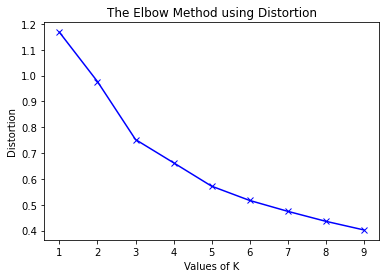

Visualizing the results using the different values of Inertia
1 : 239.99999999999991
2 : 154.85548262139272
3 : 87.31369540936937
4 : 68.41935600971375
5 : 51.38354105867041
6 : 42.71970179818421
7 : 34.35161137393825
8 : 29.291755213563317
9 : 25.168292220987738


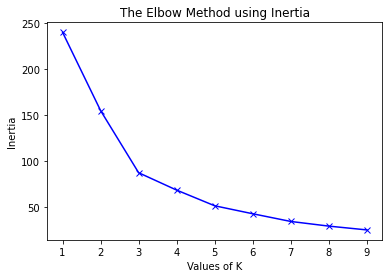

In [189]:
# prepare dataset for K-means clustering
X2 = Moscow_Borough_df[['Borough_Population','Borough_Housing_Price']]

# Normalizing over the standard deviation
X2 = StandardScaler().fit_transform(X2)

# itterate from 1 to 10 n_clusters, calculate distortion and inertia, visualize it
KMeans_elbow(X2, 10)

We can see that there are elbows at 3 centroid. Let's analyze it.

### Analyze K-Means clusters

In [218]:
# Analyze 3 centroid KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

# Add clustering labels
Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

# Analyze Clustres 
groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']



# Save dataframe
Moscow_Clustering_df.to_csv("Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)

# Print clusters 
Moscow_Clustering_df.head()

Cluster_Labels  Population_Mean  Housing_Price_Mean  Population_Sum  \
0               0     79805.666667       333794.866667         1197085   
1               1     78538.901408       173695.070423         5576262   
2               2    153187.235294       160741.323529         5208366   

   Population_%  Borough_Count  Area_Sum     Area_%  Population_Density  
0      9.990934             15    113.65  10.877992        10533.084030  
1     46.539773             71    539.87  51.673574        10328.897698  
2     43.469294             34    391.25  37.448434        13312.117572

In [190]:
# Analyze 3 centroid KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

# Add clustering labels
Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

# Analyze Clustres 
groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']

# P# Analyze 3 centroid KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

# Add clustering labels
Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

# Analyze Clustres 
groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']

# Print clusters 
Moscow_Clustering_df.head()

# Save dataframe
Moscow_Clustering_df.to_csv("Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)rint clusters 
Moscow_Clustering_df.head()

# Save dataframe
Moscow_Clustering_df.to_csv("Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)

In [191]:
Moscow_Borough_df.columns.tolist()

['Borough_Name',
 'District_Name',
 'Borough_Type',
 'OKATO_Borough_Code',
 'OKTMO_District_Code',
 'Borough_Area',
 'Borough_Population',
 'Borough_Population_Density',
 'Borough_Housing_Area',
 'Borough_Housing_Area_Per_Person',
 'Latitude',
 'Longitude',
 'Borough_Housing_Price',
 'Cluster_Labels']

As we can see, there are 3 clusters, 
- "0" Cluster - characterized by low mean population (78538 people per Borough), relatively high mean housing price (173695 rubles/m²) and low population density (10328 people/km²)
- "1" Cluster - characterized by highest mean population (153187 people per Borough), smallest mean housing price (160741 rubles/m²) and highest population density (13312 people/km²)
- "2" Cluster - characterized by low mean population (79805 people per Borough), highest mean housing price (333794 rubles/m²) and low population density (10533 people/km²)

Very good result of the KMean clustering.   
"1" Cluster perfectly fits my research criteria. 
- boroughs from this cluster have highest mean population and smallest mean housing price
- in 34 boroughs about 43% of the Moscow population occupied only 37% of the Moscow City area, that mean the highest population density

**Vizualize clusters using boxplots visualization**

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'


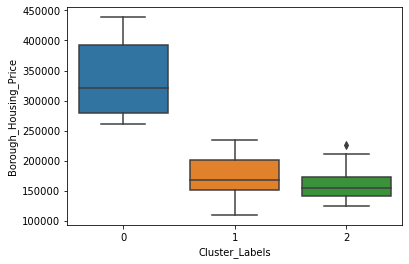

In [192]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'")
sns.boxplot(x="Cluster_Labels", y="Borough_Housing_Price", data=Moscow_Borough_df)

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'


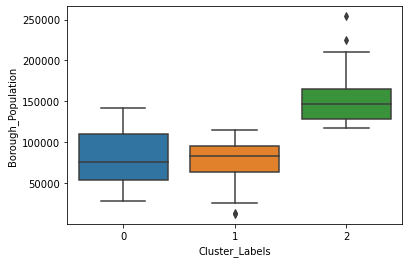

In [193]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'")
sns.boxplot(x="Cluster_Labels", y="Borough_Population", data=Moscow_Borough_df)

**Vizualize clusters using choropleth map**

In [194]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'
# Scrime_moscow.geojson
# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

import codecs
file = codecs.open('mo.geojson', "r", "utf-8" )
mo1_geojson = file.read()
file.close()

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# generate choropleth map
Moscow_map.choropleth(
    geo_data=mo1_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Clasters in Moscow City by population')
Moscow_map

C:\Users\All\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [195]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'
# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

file = codecs.open('mo.geojson', "r", "utf-8" )
mo1_geojson = file.read()
file.close()

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

Moscow_map.choropleth(
    geo_data=mo1_geojson,
    data=Moscow_Borough_df,
    name='Housing_Price',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='PuBuGn', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Clasters in Moscow City by Housing_Price')
Moscow_map

## Moscow Boroughs venues
To determine venues the service Forsquare API was used.
The API of Forsquare service have the restriction of 100 venues, which it can return in one request.
To obtain list of all venues I used the following approach:

present Moscow area in the form of a regular grid of circles of quite small diameter, no more than 100 venues in each circle
perform exploration using Forsquare API with quite bigger radius than circle of a grid to make sure it overlaps/full coverage to don't miss any venues
cleaning list of venues from duplicates.
This approach and some of the Python code was taken from the work presented here. https://cocl.us/coursera_capstone_notebook

Circle of 28 000 meters in radius cover all Moscow Boroughs.
In my research grid of circles contains 7899 cells with radius 300 meter.
Foursquare API have a certain limitation for API call in one day to explore venues. It takes several days to get Venue list. 


In [196]:
CLIENT_ID = 'UGHOCJQLX4ZG2WEWLDFNRHU3W5XXHLBQALKX1BZBUIZCFTWZ' # Foursquare ID
CLIENT_SECRET = 'HQFIPE1IU3SYVK0YRNT1KW0D3UOLST3YCKSOS1TUWRG3FKXD' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [197]:
# Prepare dataset with cell which is not yet have been processed. 1000 record in one batch
# Moscow_cells_for_explore_df = Moscow_cells_df[~Moscow_cells_df['Cell_id'].isin(Moscow_cells_explored_df['Cell_id'])].head(1000)

# Itterate through all cell prepared for explore
#for index, lat, lng in zip(Moscow_cells_for_explore_df.index, Moscow_cells_for_explore_df['Cell_Latitude'], Moscow_cells_for_explore_df['Cell_Longitude']):
#    print('Explore Cell {}'.format(index), end='')
#    
#    try:
#        venues = get_venues_near_location(lat, lng, client_id, client_secret, radius=explore_radius, limit=limit)
#        print(' - found {} veenues'.format(len(venues)))
#
#        # if found any venues add they to dataframe
#        if (len(venues) > 0):
#            Moscow_venues_df = Moscow_venues_df.append([(index, lat, lng, v[0], v[1], v[2], v[3], v[4], v[5], v[6], "") for v in venues], ignore_index=True)
#
#        # save cell id as already explored
#        Moscow_cells_explored_df.loc[index] = index 
#        
#    except Exception as err:
#        print(err)
#        pass
#
#Moscow_cells_explored_df.to_csv("data\Moscow_cells_explored_df.csv", index = False)
#Moscow_venues_df.to_csv("data\Moscow_venues_df_raw.csv", index = False)

In [198]:
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv") # 

# Columns of result dataset
#column_names = ['Cell_id', 'Cell_Latitude', 'Cell_Longitude', 'Venue_Id', 'Venue_Name', 
#              'Venue_All_Categories','Venue_Latitude', 'Venue_Longitude', 'Venue_Location', 'Venue_Distance', 'Borough_Name'] 

# Rename columns
#Moscow_venues_df.columns=column_names

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_venues_df.head())
print(Moscow_venues_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_venues_df.dtypes)

Take a look at the dataframe
                                 Cell_id  Cell_Latitude  Cell_Longitude  \
0   55.495602095714474,37.57861540203092      55.495602       37.578615   
1    55.50758514958972,37.54174627248485      55.507585       37.541746   
2    55.50758514958972,37.54174627248485      55.507585       37.541746   
3  55.502471754330976,37.568063025269716      55.502472       37.568063   
4    55.50076610141684,37.57683340142805      55.500766       37.576833   

                   Venue_Id            Venue_Name  \
0  4c2325d013c00f47638e88de       Рынок «Удобный»   
1  501abe19e4b07bd245dabf68  Пруд "Утиная гавань"   
2  58b6a74a109dfe2494c95358           Imperia BMW   
3  578e94bc498e584562d31cad        Центр Плова 24   
4  5519adb1498e70931fb8eb51               Сушиwok   

                                Venue_All_Categories  Venue_Latitude  \
0   [('Hardware Store', '4bf58dd8d48988d112951735')]       55.498413   
1             [('Lake', '4bf58dd8d48988d161941735')]     

In [199]:
# Count duplicates venues
print('Unique Venues {} of {}'.format(Moscow_venues_df['Venue_Id'].nunique(), Moscow_venues_df['Venue_Id'].shape[0]))

# Drop duplicates
print('Delete duplicates')
Moscow_venues_df.drop_duplicates(subset ="Venue_Id", keep = 'first', inplace = True) 

# Reset index
Moscow_venues_df.reset_index(inplace = True) 

# Take a look at the dataframe
print('Take a look at the dataframe shape')
print(Moscow_venues_df.shape)

Unique Venues 20864 of 20864
Delete duplicates
Take a look at the dataframe shape
(20864, 14)


In [200]:
# Get first category for each Venue
Moscow_venues_df['Venue_Category_Name'] = Moscow_venues_df['Venue_All_Categories'].apply(lambda x: x.strip('[()]').split(', ')[0].strip("'"))
Moscow_venues_df['Venue_Category_Id'] = Moscow_venues_df['Venue_All_Categories'].apply(lambda x: x.strip('[()]').split(', ')[1].strip("'"))

print('Take a look at the Venue Category')
print(Moscow_venues_df[['Venue_Name', 'Venue_Category_Name', 'Venue_Category_Id']].head())

Take a look at the Venue Category
             Venue_Name   Venue_Category_Name         Venue_Category_Id
0       Рынок «Удобный»        Hardware Store  4bf58dd8d48988d112951735
1  Пруд "Утиная гавань"                  Lake  4bf58dd8d48988d161941735
2           Imperia BMW         Auto Workshop  56aa371be4b08b9a8d5734d3
3        Центр Плова 24  Fast Food Restaurant  4bf58dd8d48988d16e941735
4               Сушиwok      Sushi Restaurant  4bf58dd8d48988d1d2941735


### Visialize a map of some Moscow Boroughs with venues

In [201]:
# Moscow latitude and longitude values
Moscow_subset_lat = Moscow_Borough_df[Moscow_Borough_df['Borough_Name'] == 'Люблино']['Latitude'].iloc[0]
Moscow_subset_lng = Moscow_Borough_df[Moscow_Borough_df['Borough_Name'] == 'Люблино']['Longitude'].iloc[0]

# create map and display it
Moscow_map = folium.Map(location=[Moscow_subset_lat, Moscow_subset_lng], zoom_start=12)

# generate choropleth map
#Moscow_map.choropleth(
#    geo_data=mo1_geojson,
 #   data=Moscow_Borough_df,
  #  name='Population Density',
#    columns=['Borough_Name', ''],
#    key_on='feature.properties.NAME',
#    fill_color='YlOrRd', 
#    fill_opacity=0.7, 
#    line_opacity=0.2,
#    legend_name='Borough Population in Moscow City'
#)
Moscow_map.choropleth(
    geo_data=mo1_geojson,
    data=Moscow_Borough_df,
    name='Housing_Price',
    columns=['Borough_Name', 'Borough_Population'],
    key_on='feature.properties.NAME',
    fill_color='PuBuGn', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Clasters in Moscow City by Borough_Population')
Moscow_map

#==============================================================================
# Create Venues subset for some Boroughs
#==============================================================================
Moscow_venues_subset = Moscow_venues_df[Moscow_venues_df['Borough_Name'].isin(['Марьино', 'Люблино'])]

#==============================================================================
# Add markers to map for venues
#==============================================================================
for Venue_name, lat, lng in zip(Moscow_venues_subset['Venue_Name'], Moscow_venues_subset['Venue_Latitude'], Moscow_venues_subset['Venue_Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)


# display map
Moscow_map


C:\Users\All\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [202]:
Moscow_venues_df.groupby('Borough_Name').count()

index  Cell_id  Cell_Latitude  Cell_Longitude  Venue_Id  \
Borough_Name                                                             
Академический    171      171            171             171       171   
Алексеевский     156      156            156             156       156   
Алтуфьевский      34       34             34              34        34   
Арбат            203      203            203             203       203   
Аэропорт         162      162            162             162       162   
...              ...      ...            ...             ...       ...   
Южное Тушино     160      160            160             160       160   
Южнопортовый     177      177            177             177       177   
Якиманка         321      321            321             321       321   
Ярославский      121      121            121             121       121   
Ясенево          292      292            292             292       292   

               Venue_Name  Venue_All_Categories  Venue_Latitude  \
Borough_Name                                                      
Академический         171                   171             171   
Алексеевский          156                   156             156   
Алтуфьевский           34                    34              34   
Арбат                 203                   203             203   
Аэропорт              162                   162             162   
...                   ...                   ...             ...   
Южное Тушино          160                   160             160   
Южнопортовый          177                   177             177   
Якиманка              321                   321             321   
Ярославский           121                   121             121   
Ясенево               292                   292             292   

               Venue_Longitude  Venue_Location  Venue_Distance  \
Borough_Name                                                     
Академический              171             171             171   
Алексеевский               156             156             156   
Алтуфьевский                34              34              34   
Арбат                      203             203             203   
Аэропорт                   162             162             162   
...                        ...             ...             ...   
Южное Тушино               160             160             160   
Южнопортовый               177             177             177   
Якиманка                   321             321             321   
Ярославский                121             121             121   
Ясенево                    292             292             292   

               Venue_Category_Name  Venue_Category_Id  
Borough_Name                                           
Академический                  171                171  
Алексеевский                   156                156  
Алтуфьевский                    34                 34  
Арбат                          203                203  
Аэропорт                       162                162  
...                            ...                ...  
Южное Тушино                   160                160  
Южнопортовый                   177                177  
Якиманка                       321                321  
Ярославский                    121                121  
Ясенево                        292                292  

[120 rows x 13 columns]

In [203]:
print('There are {} uniques categories.'.format(len(Moscow_venues_df['Venue_Category_Name'].unique())))

There are 496 uniques categories.


In [204]:
# one hot encoding
M_onehot = pd.get_dummies(Moscow_venues_df[['Venue_Category_Name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Borough_Name'] = Moscow_venues_df['Borough_Name'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

M_onehot.head()

Borough_Name  "Men's Store"  "Women's Store"  ATM  Accessories Store  \
0  Южное Бутово              0                0    0                  0   
1  Южное Бутово              0                0    0                  0   
2  Южное Бутово              0                0    0                  0   
3  Южное Бутово              0                0    0                  0   
4  Южное Бутово              0                0    0                  0   

   Adult Boutique  Advertising Agency  Airport  Airport Lounge  \
0               0                   0        0               0   
1               0                   0        0               0   
2               0                   0        0               0   
3               0                   0        0               0   
4               0                   0        0               0   

   Airport Service  ...  Waterfront  Well  Whisky Bar  Windmill  Wine Bar  \
0                0  ...           0     0           0         0         0   
1                0  ...           0     0           0         0         0   
2                0  ...           0     0           0         0         0   
3                0  ...           0     0           0         0         0   
4                0  ...           0     0           0         0         0   

   Wine Shop  Wings Joint  Yoga Studio  Zoo  Zoo Exhibit  
0          0            0            0    0            0  
1          0            0            0    0            0  
2          0            0            0    0            0  
3          0            0            0    0            0  
4          0            0            0    0            0  

[5 rows x 497 columns]

In [205]:
M_onehot.shape

(20864, 497)

Group rows by neighbourhood and by taking the mean of the occurrence frequency of each category

In [206]:
M_grouped = M_onehot.groupby('Borough_Name').mean().reset_index()
M_grouped.shape

(120, 497)

Create the new dataframe and display the top 10 venues for each neighbourhood.

In [207]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough_Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Borough_Name'] = M_grouped['Borough_Name']

for ind in np.arange(M_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(10)

Borough_Name 1st Most Common Venue 2nd Most Common Venue  \
0    Академический              Pharmacy           Coffee Shop   
1     Алексеевский         Auto Workshop                  Park   
2     Алтуфьевский           Supermarket         Auto Workshop   
3            Арбат           Coffee Shop                Bakery   
4         Аэропорт           Coffee Shop                  Café   
5     Бабушкинский                  Park              Pharmacy   
6        Басманный           Coffee Shop                  Café   
7          Беговой           Coffee Shop          Dance Studio   
8  Бескудниковский              Bus Stop              Bus Line   
9         Бибирево           Supermarket                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park         Auto Workshop                Bakery   
1           Supermarket           Pizza Place                 Hotel   
2    Light Rail Station           Bus Station     Health Food Store   
3                Hostel                 Hotel                Museum   
4        Cosmetics Shop              Pharmacy                  Park   
5                   Gym           Supermarket              Bus Stop   
6  Caucasian Restaurant          Dance Studio                   Bar   
7  Gym / Fitness Center                  Café            Restaurant   
8           Pizza Place           Supermarket             Bookstore   
9              Bus Stop              Pharmacy                   Gym   

  6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
0     Health Food Store                    Wine Shop            Shoe Store   
1     Food & Drink Shop                  Coffee Shop             Pet Store   
2           Pizza Place  Eastern European Restaurant            Shoe Store   
3          Concert Hall                        Plaza  Gym / Fitness Center   
4             Wine Shop                       Bakery    Salon / Barbershop   
5  Gym / Fitness Center                   Baby Store     Food & Drink Shop   
6             Bookstore         Gym / Fitness Center           Art Gallery   
7                   Bar                        Hotel             Nightclub   
8              Pharmacy                          Gym   Japanese Restaurant   
9      Sushi Restaurant            Health Food Store  Gym / Fitness Center   

  9th Most Common Venue       10th Most Common Venue  
0          Dance Studio                  Supermarket  
1     Convenience Store                     Pharmacy  
2      Pedestrian Plaza                         Park  
3  Caucasian Restaurant                          Bar  
4     Food & Drink Shop           Italian Restaurant  
5  Fast Food Restaurant                         Café  
6              Beer Bar               Clothing Store  
7        Sandwich Place                  Pizza Place  
8        Shop & Service  Eastern European Restaurant  
9          Soccer Field         Fast Food Restaurant

### Cluster Neighbourhoods with vunues
Use k-means to cluster the neighbourhood into 5 clusters.

In [208]:
# set number of clusters
kclusters = 5

M_grouped_clustering = M_grouped.drop('Borough_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(M_grouped_clustering)
kmeans

# Add clustering labels
Moscow_Borough_df['Cluster_Labels2'] = kmeans.labels_.astype(int)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:150]


array([4, 4, 2, 1, 1, 3, 1, 1, 0, 3, 0, 0, 3, 3, 1, 0, 0, 1, 3, 4, 3, 3,
       4, 4, 3, 1, 3, 1, 1, 1, 2, 4, 4, 3, 4, 2, 4, 3, 0, 4, 1, 4, 3, 2,
       0, 4, 4, 0, 4, 3, 3, 3, 1, 4, 0, 1, 4, 2, 0, 4, 4, 4, 4, 3, 2, 0,
       4, 3, 4, 4, 3, 1, 4, 2, 3, 2, 2, 4, 1, 4, 4, 0, 2, 4, 4, 3, 3, 2,
       3, 0, 1, 4, 4, 0, 0, 1, 1, 3, 0, 4, 0, 4, 4, 1, 3, 4, 1, 0, 4, 4,
       3, 4, 4, 0, 3, 2, 4, 1, 2, 0])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood.

In [209]:
M_merged = Moscow_Borough_df

M_merged = M_merged.join(neighbourhoods_venues_sorted.set_index('Borough_Name'), on='Borough_Name')
M_merged.head()

Borough_Name District_Name         Borough_Type  OKATO_Borough_Code  \
0  Академический          ЮЗАО  Муниципальный округ            45293554   
1   Алексеевский          СВАО  Муниципальный округ            45280552   
2   Алтуфьевский          СВАО  Муниципальный округ            45280554   
3          Арбат           ЦАО  Муниципальный округ            45286552   
4       Аэропорт           САО  Муниципальный округ            45277553   

   OKTMO_District_Code  Borough_Area  Borough_Population  \
0             45397000          5.83              109387   
1             45349000          5.29               80534   
2             45350000          3.25               57596   
3             45374000          2.11               36125   
4             45333000          4.58               79486   

   Borough_Population_Density  Borough_Housing_Area  \
0                       18762                2467.0   
1                       15223                1607.9   
2                       17721                 839.3   
3                       17120                 731.0   
4                       17355                1939.7   

   Borough_Housing_Area_Per_Person  ...  1st Most Common Venue  \
0                             22.7  ...               Pharmacy   
1                             20.5  ...          Auto Workshop   
2                             15.5  ...            Supermarket   
3                             26.0  ...            Coffee Shop   
4                             25.9  ...            Coffee Shop   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0            Coffee Shop                   Park          Auto Workshop   
1                   Park            Supermarket            Pizza Place   
2          Auto Workshop     Light Rail Station            Bus Station   
3                 Bakery                 Hostel                  Hotel   
4                   Café         Cosmetics Shop               Pharmacy   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0                 Bakery     Health Food Store                    Wine Shop   
1                  Hotel     Food & Drink Shop                  Coffee Shop   
2      Health Food Store           Pizza Place  Eastern European Restaurant   
3                 Museum          Concert Hall                        Plaza   
4                   Park             Wine Shop                       Bakery   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0            Shoe Store          Dance Studio            Supermarket  
1             Pet Store     Convenience Store               Pharmacy  
2            Shoe Store      Pedestrian Plaza                   Park  
3  Gym / Fitness Center  Caucasian Restaurant                    Bar  
4    Salon / Barbershop     Food & Drink Shop     Italian Restaurant  

[5 rows x 25 columns]

We find out most common venue in each district.

In [210]:
M_merged1 = M_merged
M_merged1['Cluster_Labels'] = M_merged['Cluster_Labels'] +1

M_merged1['Cluster_Labels2'] = M_merged['Cluster_Labels2'] +1

df = M_merged1
fig = px.sunburst(df, path=['District_Name', 'Borough_Housing_Price'], values='Cluster_Labels', color='Cluster_Labels2') 
fig.show()


# Result

The result of my research consisted of:

- List of the optimal Boroughs for the location of Auto Workshop, according to the main criterias
  - high population of the borough
  - low cost of real estate in the borough
- List of the other competitive facilities in the each Borough from the optimal list
- Interactive choropleth map and heatmap with other competitive facilities in the each Borough

## Dataset of the optimal Boroughs

In [211]:
# List of optimal Boroughs for the location
Moscow_Recomended_Borough_df = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]

# Drop some colums 
Moscow_Recomended_Borough_df.drop(['Latitude','Longitude','Cluster_Labels', 'Borough_Housing_Area_Per_Person'], axis=1, inplace=True)

# reset index
Moscow_Recomended_Borough_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_Recomended_Borough_df.to_csv("Moscow_Recomended_Borough_df.csv", index = False)

# Take a look at the dataframe in case of the same facilities
Moscow_Recomended_Borough_df

C:\Users\All\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Borough_Name District_Name         Borough_Type  OKATO_Borough_Code  \
0      Академический          ЮЗАО  Муниципальный округ            45293554   
1       Алексеевский          СВАО  Муниципальный округ            45280552   
2       Алтуфьевский          СВАО  Муниципальный округ            45280554   
3           Аэропорт           САО  Муниципальный округ            45277553   
4       Бабушкинский          СВАО  Муниципальный округ            45280556   
..               ...           ...                  ...                 ...   
66            Щукино          СЗАО  Муниципальный округ            45283587   
67  Южное Медведково          СВАО  Муниципальный округ            45280594   
68      Южное Тушино          СЗАО  Муниципальный округ            45283593   
69      Южнопортовый          ЮВАО  Муниципальный округ            45290594   
70       Ярославский          СВАО  Муниципальный округ            45280597   

    OKTMO_District_Code  Borough_Area  Borough_Population  \
0              45397000          5.83              109387   
1              45349000          5.29               80534   
2              45350000          3.25               57596   
3              45333000          4.58               79486   
4              45351000          5.07               88537   
..                  ...           ...                 ...   
66             45372000          7.69              111203   
67             45364000          3.88               85698   
68             45373000          7.94              109218   
69             45396000          4.53               74729   
70             45365000          7.99               98108   

    Borough_Population_Density  Borough_Housing_Area  Borough_Housing_Price  \
0                        18762                2467.0               199999.0   
1                        15223                1607.9               199474.0   
2                        17721                 839.3               138021.0   
3                        17355                1939.7               234544.0   
4                        17462                1586.3               164324.0   
..                         ...                   ...                    ...   
66                       14460                2062.0               233545.0   
67                       22087                1355.3               155965.0   
68                       13755                1714.9               162854.0   
69                       16496                1449.0               190357.0   
70                       12278                1404.5               159241.0   

    Cluster_Labels2  
0                 4  
1                 4  
2                 2  
3                 1  
4                 3  
..              ...  
66                4  
67                3  
68                2  
69                4  
70                2  

[71 rows x 11 columns]

## Dataset of the competitive facilities

In [212]:
# prepare the result dataset with fitness center 
Moscow_rec_venues_df = Moscow_venues_df[['Borough_Name','Venue_Name','Venue_Category_Name','Venue_Location','Venue_Latitude','Venue_Longitude']]

# reset index
Moscow_rec_venues_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_rec_venues_df.to_csv("Moscow_rec_venues_df.csv", index = False)

# Take a look at the dataframe
Moscow_rec_venues_df.head(30)

Borough_Name                             Venue_Name  \
0   Южное Бутово                        Рынок «Удобный»   
1   Южное Бутово                   Пруд "Утиная гавань"   
2   Южное Бутово                            Imperia BMW   
3   Южное Бутово                         Центр Плова 24   
4   Южное Бутово                                Сушиwok   
5   Южное Бутово                     Захарьинские пруды   
6   Южное Бутово  Конно-спортивный комплекс «Захарьино»   
7   Южное Бутово                            Шале Божоле   
8   Южное Бутово                            Перекресток   
9   Южное Бутово                        С Дэном На Авто   
10  Южное Бутово                              Пятерочка   
11  Южное Бутово                              Южный Лёд   
12  Южное Бутово                        Магазин Угловой   
13  Южное Бутово                      Захарьинский пруд   
14  Южное Бутово                  Поле для выгула собак   
15  Южное Бутово                   Перекресток Экспресс   
16  Южное Бутово                                    Лес   
17  Южное Бутово                       Собачья площадка   
18  Южное Бутово                    На Детской Площадке   
19  Южное Бутово       Остановка «Маршала Савицкого 22»   
20  Южное Бутово                                 butovo   
21  Южное Бутово             Остановка «Центр госуслуг»   
22  Южное Бутово              Теннисный корт в Потапово   
23  Южное Бутово        Остановка «Милицейский посёлок»   
24  Южное Бутово                Универсам "Милицейский"   
25  Южное Бутово                         Магазин мебели   
26  Южное Бутово                       Потаповский пруд   
27  Южное Бутово               детская площадка У пруда   
28  Южное Бутово                           Privet Drive   
29  Южное Бутово             футбольное поле "Потапово"   

       Venue_Category_Name                               Venue_Location  \
0           Hardware Store       Симферопольское ш., 17 (Обводная дор.)   
1                     Lake                                       Россия   
2            Auto Workshop                Староникольская 84а, Щербинка   
3     Fast Food Restaurant                    Симферопольское шоссе, 5Д   
4         Sushi Restaurant  Захарьинские дворики, д. 1, корп. 2, 117148   
5                     Lake                                       Россия   
6                  Stadium                                ул. Брусилова   
7              Art Gallery                           2ая Баришевская, 4   
8              Supermarket                                       117623   
9      Rental Car Location                                       Россия   
10            Gourmet Shop                          Маршала Савицкого,6   
11            Skating Rink                                       117623   
12           Grocery Store                    ул. Маршала Савицкого, 12   
13                    Lake                                     Щербинка   
14                 Dog Run                                       Россия   
15        Department Store                Маршала Савицкого 26 Корпус 2   
16                  Castle                                       Россия   
17                 Dog Run                                       Россия   
18              Playground                        ул. Маршала Савицкого   
19                Bus Stop                        ул. Маршала Савицкого   
20             Comedy Club                                       Россия   
21                Bus Stop                        ул. Маршала Савицкого   
22            Tennis Court                                       Россия   
23                Bus Stop                                       Москва   
24        Department Store                    Дачная Улица, 7, Щербинка   
25  Furniture / Home Store                    Типографская, 4, Щербинка   
26                    Lake                                       Россия   
27              Playground                                       Россия   

In [213]:
# load previously saved dataset
Moscow_rec_venues_df = pd.read_csv("Moscow_venues_df.csv")

# list of the recomended  Boughs from cluster 1
Moscow_Recomended_Borough_list = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]['Borough_Name']

# list of all subcategories 
categories = ['Auto Workshop','Auto']

# Make venues subset of all subcategories of "Gym / Fitness Center"
Moscow_rec_venues_df = Moscow_venues_df[Moscow_venues_df['Venue_Category_Name'].isin(categories)]
print('There are {} venues of "Auto Workshop of all {} venues in Moscow City'.format(Moscow_rec_venues_df.shape[0], Moscow_venues_df.shape[0]))

# Delete Venues that placed outside our cluster 1
Moscow_rec_venues_df = Moscow_gym_venues_df[Moscow_gym_venues_df['Borough_Name'].isin(Moscow_Recomended_Borough_list)]
print('There are {} venues of all Auto Workshop in 1 Cluster'.format(Moscow_rec_venues_df.shape[0]))

There are 422 venues of "Auto Workshop of all 20864 venues in Moscow City
There are 419 venues of all Auto Workshop in 1 Cluster


In [214]:
Moscow_Borough_df.head()

Borough_Name District_Name         Borough_Type  OKATO_Borough_Code  \
0  Академический          ЮЗАО  Муниципальный округ            45293554   
1   Алексеевский          СВАО  Муниципальный округ            45280552   
2   Алтуфьевский          СВАО  Муниципальный округ            45280554   
3          Арбат           ЦАО  Муниципальный округ            45286552   
4       Аэропорт           САО  Муниципальный округ            45277553   

   OKTMO_District_Code  Borough_Area  Borough_Population  \
0             45397000          5.83              109387   
1             45349000          5.29               80534   
2             45350000          3.25               57596   
3             45374000          2.11               36125   
4             45333000          4.58               79486   

   Borough_Population_Density  Borough_Housing_Area  \
0                       18762                2467.0   
1                       15223                1607.9   
2                       17721                 839.3   
3                       17120                 731.0   
4                       17355                1939.7   

   Borough_Housing_Area_Per_Person   Latitude  Longitude  \
0                             22.7  55.689738  37.576771   
1                             20.5  55.814878  37.650668   
2                             15.5  55.880255  37.581635   
3                             26.0  55.746208  37.589457   
4                             25.9  55.800402  37.533156   

   Borough_Housing_Price  Cluster_Labels  Cluster_Labels2  
0               199999.0               1                4  
1               199474.0               1                4  
2               138021.0               1                2  
3               438568.0               0                1  
4               234544.0               1                1

## Choropleth map and heatmap of competitive facilities

In [215]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)


# generate choropleth map
Moscow_map.choropleth(
    geo_data=mo1_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Clustering in Moscow City')

# List comprehension to make out list of lists
heat_data = [[row['Venue_Latitude'], row['Venue_Longitude']] for index, row in Moscow_rec_venues_df.iterrows()]

# Add HeatMap
HeatMap(heat_data).add_to(Moscow_map)

# Add facilities as markers to Moscow map 
for Venue_name, lat, lng in zip(Moscow_rec_venues_df['Venue_Name'], Moscow_rec_venues_df['Venue_Latitude'], Moscow_rec_venues_df['Venue_Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=1, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(Moscow_map)

# display map
Moscow_map

C:\Users\All\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



### Thanks for viewing this Notebook. 